# <h1 style="color:red"> Data Analysis - Inferential Analysis - Question and Answer with Python </h1>
<b>Justification or answer summary needed for every question</b> 

<h2 style="color:purple"> Data Collection </h2>

# --------------------------------------------

In [190]:
import pandas as pd
import numpy as np
dataset=pd.read_csv("Placement.csv")
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [191]:
dataset.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

<h3 style="color:green">✅  The Placement dataset has 215 rows × 15 columns.</h3>

# --------------------------------------------

<h2 style="color:purple">❓ 1. Replace the NaN values with correct value. And justify why you have
chosen the same.</h2>

In [192]:
# Check null value
dataset.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


👉 In the dataset, 67 students are not placed, so their salary values are missing. Since these students did not receive a salary, we can fill the missing values with zero.

Missing values can generally be handled using various methods such as:

1. Mean imputation

2. Median imputation

3. Mode imputation

4. KNN or predictive model imputation

5. Constant value imputation


<h3 style="color:green">✅ In this case, we use a <b>constant value (zero)</b> because it accurately reflects that unplaced students have no salary. </h3>

In [193]:
# Fill missing salary values with zero
dataset['salary'] = dataset['salary'].fillna(0)
#recheck null values
dataset['salary'].isnull().sum()

np.int64(0)

<h3 style="color:green"> ✅ Replaced-67 null values to zero in the salary column </h3>

# --------------------------------------------

<h2 style="color:purple">❓ 2) How many of them are not placed?</h2>

In [194]:
# Count of each category
counts = dataset['status'].value_counts()
print("Count of placed vs not placed:\n", counts)

# Percentage of each category
percentages = dataset['status'].value_counts(normalize=True) * 100
print("\nPercentage % of placed vs not placed:\n", percentages.round(2))

Count of placed vs not placed:
 status
Placed        148
Not Placed     67
Name: count, dtype: int64

Percentage % of placed vs not placed:
 status
Placed        68.84
Not Placed    31.16
Name: proportion, dtype: float64


<h3 style="color:green">✅  67 students (31.16%) were not placed </h3>

# --------------------------------------------

<h2 style="color:purple">❓ 3. Find the reason for non placement from the dataset?
</h2>

<h2 style="color:blue">Compare numeric features</h2>

In [195]:
numeric_cols = ['ssc_p','hsc_p','degree_p','mba_p','etest_p']
# Mean comparison
dataset.groupby('status')[numeric_cols].mean()

,ssc_p,hsc_p,degree_p,mba_p,etest_p
status,,,,,
Not Placed,57.544030,58.395522,61.134179,61.612836,69.587910
Placed,71.721486,69.926554,68.740541,62.579392,73.238041


<h2 style="color:green"><li>✅ Lower 10th/12th/degree/mba marks or etest scores may correlate with Not Placed.<li>10th and 12th mark are major factor for not placed </h2>

<h2 style="color:blue">Compare categorical features</h2>

In [196]:
categorical_cols = ['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation']

for col in categorical_cols:
    print(f"\nColumn: {col}")
    
    # Create crosstab with percentages
    ctab = pd.crosstab(dataset[col], dataset['status'], normalize='index') * 100
    
    # Add a column for difference between 'Placed' and 'Not Placed' percentages
    if 'Placed' in ctab.columns and 'Not Placed' in ctab.columns:
        ctab['Difference'] = ctab['Placed'] - ctab['Not Placed']
    elif 'Placed' in ctab.columns:
        ctab['Difference'] = ctab['Placed']
    elif 'Not Placed' in ctab.columns:
        ctab['Difference'] = -ctab['Not Placed']
    
    print(ctab.round(2))


Column: gender
status  Not Placed  Placed  Difference
gender                                
F            36.84   63.16       26.32
M            28.06   71.94       43.88

Column: ssc_b
status   Not Placed  Placed  Difference
ssc_b                                  
Central       32.76   67.24       34.48
Others        29.29   70.71       41.41

Column: hsc_b
status   Not Placed  Placed  Difference
hsc_b                                  
Central       32.14   67.86       35.71
Others        30.53   69.47       38.93

Column: hsc_s
status    Not Placed  Placed  Difference
hsc_s                                   
Arts           45.45   54.55        9.09
Commerce       30.09   69.91       39.82
Science        30.77   69.23       38.46

Column: degree_t
status     Not Placed  Placed  Difference
degree_t                                 
Comm&Mgmt       29.66   70.34       40.69
Others          54.55   45.45       -9.09
Sci&Tech        30.51   69.49       38.98

Column: workex
status  Not Pl

<h2 style="color:blue">plot view</h2>

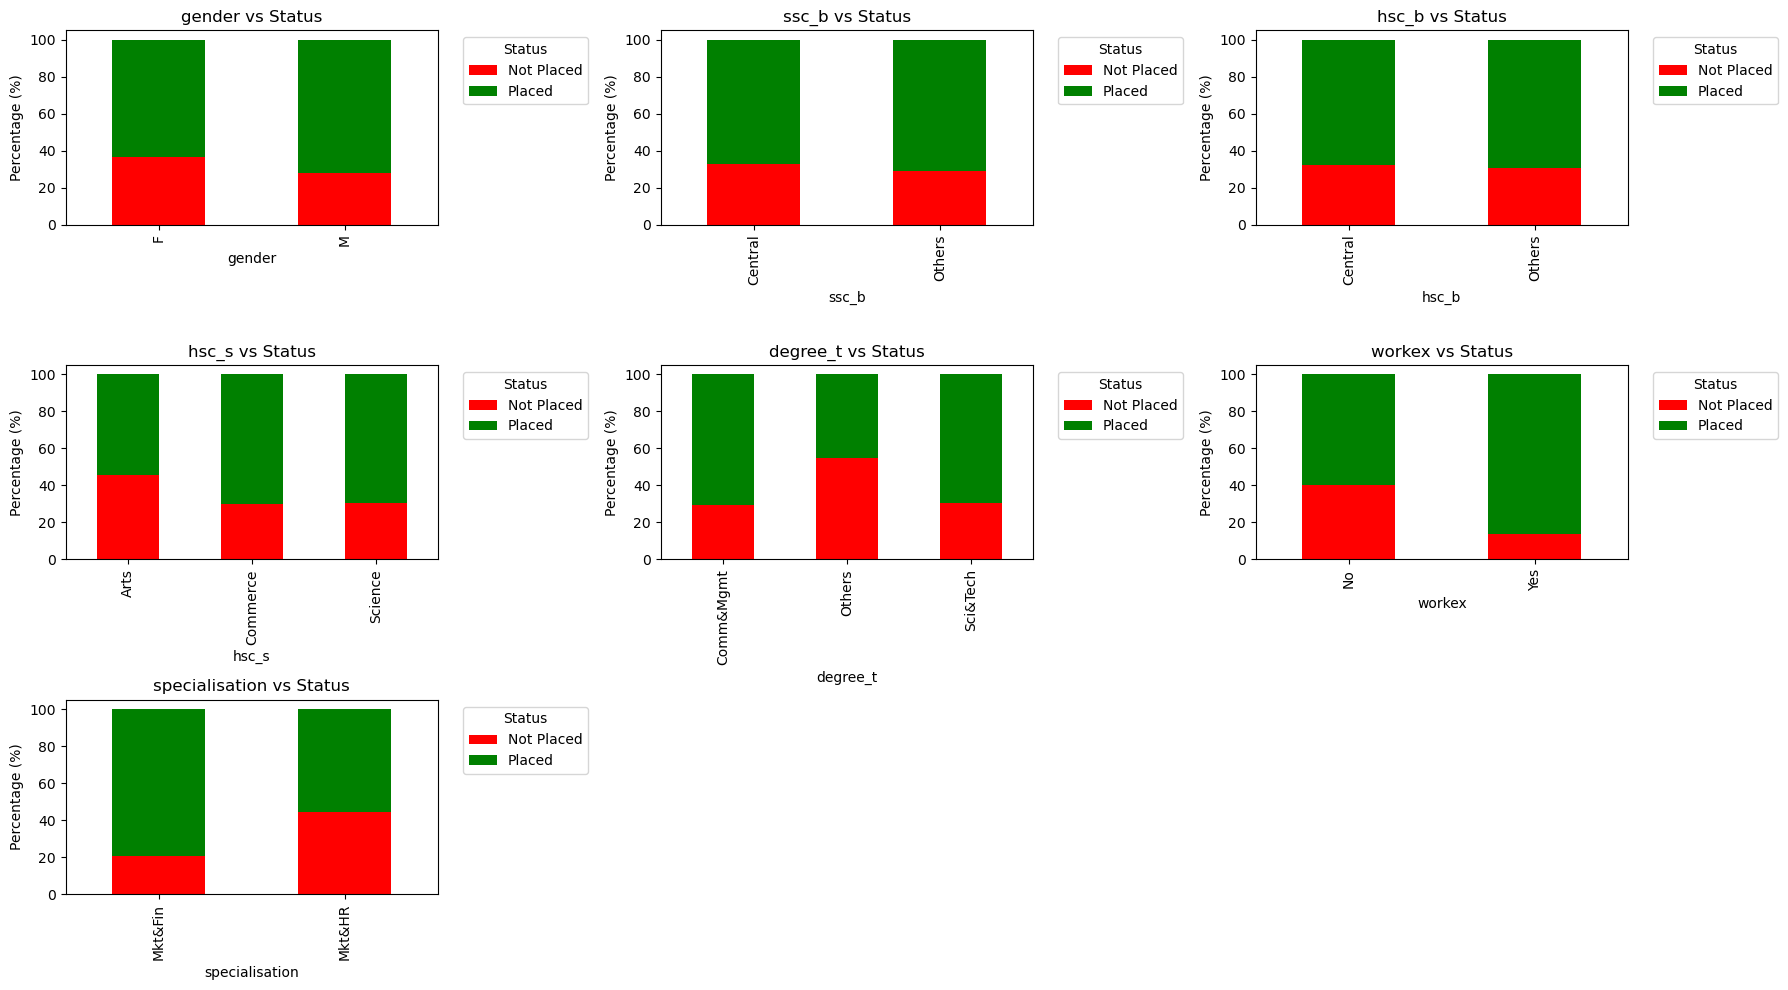

In [197]:
import pandas as pd
import matplotlib.pyplot as plt

# Columns to analyze
columns = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']

# Create 3x3 grid (9 subplots, but we'll use only 7)
fig, axs = plt.subplots(3, 3, figsize=(18, 10))
axs = axs.flatten()  # Flatten for easy iteration

# Define colors
colors = {'Placed': 'green', 'Not Placed': 'red'}

# Loop through all columns
for i, col in enumerate(columns):
    # Crosstab as percentages
    ctab = pd.crosstab(dataset[col], dataset['status'], normalize='index') * 100
    
    # Plot stacked bar chart
    ctab.plot(
        kind='bar',
        stacked=True,
        ax=axs[i],
        color=[colors.get(x, 'gray') for x in ctab.columns]
    )
    
    axs[i].set_title(f"{col} vs Status", fontsize=12)
    axs[i].set_ylabel("Percentage (%)")
    axs[i].legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Remove any unused subplots
for j in range(len(columns), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


✅ This shows, for example:

1. If workexepriance = No, % of Not Placed may be higher.
2. If specialisation  = Mkt&HR, % of Not Placed may be Moderate.
3. If hsc_s = Arts group, % of Not Placed may be Lower.
3. If degree_t = other group, % of Not Placed may be Lower.

<h3 style="color:green">✅  Conclusion (from initial analysis):</h3>

<b>No work experience is a major factor.</b>

<b>Lower exam scores (ssc_p, hsc_p, degree_p, etest_p, mba_p) contribute.</b>

<b>Certain specialisations,hsc_s' Arts group might have lower placement rates. </b>

# --------------------------------------------

<h2 style="color:purple">❓4) What kind of relation between salary and mba_p</h2>

In [198]:
#Correlation
dataset[['mba_p','salary']].corr()

,mba_p,salary
mba_p,1.000000,0.139823
salary,0.139823,1.000000


<h3 style="color:green">✅ 'mba_p' vs 'salary' Correlation = 00.139823 , low degree of +ve correlation</h3>

# --------------------------------------------

<h2 style="color:purple">❓5) Which specialization is getting minimum salary?</h2>

In [199]:
# Find specialization with minimum average salary
min_salary_spec = dataset.groupby('specialisation')['salary'].mean().idxmin()
min_salary_value = dataset.groupby('specialisation')['salary'].mean().min()

print(f"The specialization with the minimum average salary is '{min_salary_spec}' with an average salary of {min_salary_value:.2f}.")


The specialization with the minimum average salary is 'Mkt&HR' with an average salary of 150842.11.


<h3 style="color:green">✅ The specialization with the minimum average salary is 'Mkt&HR' with an average salary of 150842</h3>

# --------------------------------------------

<h2 style="color:purple">❓ 6) How many of them getting above 500000 salary? </h2>

In [165]:
#gettinabove 5,00,00 salary
print(dataset[dataset['salary'] > 500000]['salary'])
dataset[dataset['salary'] > 500000]['salary'].count()

119    940000.0
150    690000.0
177    650000.0
Name: salary, dtype: float64


np.int64(3)

<h3 style="color:green">✅  3 of them getting above 500000 salary </h3>

# --------------------------------------------

<h2 style="color:purple">❓7) Test the Analysis of Variance between etest_p and mba_p at signifance level 5%.(Make decision using Hypothesis Testing) </h2>

In [200]:
import pandas as pd
from scipy.stats import f_oneway

# one way test 'etest_p' and 'mba_p'
x='etest_p'
y='mba_p'
mean='salary'
f_stat, p_value = f_oneway(dataset[x], dataset['mba_p'])

print("F-statistic:", round(f_stat, 3))
print("P-value:", round(p_value, 4))

# Decision based on significance level α = 0.05
alpha = 0.05
print("\n--- Hypothesis ---")
print(f"H₀: Null Hypothesis - There is no significant difference between {x} and {y}.")
print(f"H₁: Alternate Hypothesis - There is a significant difference between {x} and {y}.")

# Decision
print("\n--- Decision ---")
if p_value < alpha:
    print(f"Since P-value ({p_value:.4f}) < α ({alpha}), we Reject H₀ and ✅ Accept H₁.")
    print(f"Conclusion: There is a significant difference between {x} and {y}.")
else:
    print(f"Since P-value ({p_value:.4f}) ≥ α ({alpha}), we ❌ Accecpt H₀")
    print(f"Conclusion: There is no significant difference between {x} and {y}.")

F-statistic: 98.645
P-value: 0.0

--- Hypothesis ---
H₀: Null Hypothesis - There is no significant difference between etest_p and mba_p.
H₁: Alternate Hypothesis - There is a significant difference between etest_p and mba_p.

--- Decision ---
Since P-value (0.0000) < α (0.05), we Reject H₀ and ✅ Accept H₁.
Conclusion: There is a significant difference between etest_p and mba_p.


<h3 style="color:green">✅ Since P-value (0.0000) < α (0.05), we Reject H₀ and ✅ Accept H₁.
Conclusion: There is a significant difference between etest_p and mba_p. </h3>

# --------------------------------------------

<h2 style="color:purple">❓8) Test the similarity between the degree_t(Sci&Tech) and specialisation(Mkt&HR) with respect to salary at significance level of 5%.(Make
decision using Hypothesis Testing) </h2>

In [201]:
from scipy.stats import ttest_ind
# Filter the two groups
group1 = dataset[dataset['degree_t'] == 'Sci&Tech']['salary']
group2 = dataset[dataset['specialisation'] == 'Mkt&HR']['salary']

meanof='salary'
x='Sci&Tech'
y='Mkt&HR'

# Perform independent t-test
t_stat, p_value = ttest_ind(group1, group2, equal_var=True)  # assuming equal variance

print("T-statistic:", round(f_stat, 3))
print("P-value:", round(p_value, 4))

# Decision based on significance level α = 0.05
alpha = 0.05
print("\n--- Hypothesis ---")
print(f"H₀: Null Hypothesis - There is no significant in mean of {meanof} difference between {x} and {y}.")
print(f"H₁: Alternate Hypothesis - There is a significant in mean of {meanof} difference between {x} and {y}.")

# Decision
print("\n--- Decision ---")
if p_value < alpha:
    print(f"Since P-value ({p_value:.4f}) < α ({alpha}), we Reject H₀ and ✅ Accept H₁.")
    print(f"Conclusion: There is a significant difference in mean of {meanof} between {x} and {y}.")
else:
    print(f"Since P-value ({p_value:.4f}) ≥ α ({alpha}), we ❌ Accecpt H₀")
    print(f"Conclusion: There is no significant difference in mean of {meanof} between {x} and {y}.")

T-statistic: 98.645
P-value: 0.0079

--- Hypothesis ---
H₀: Null Hypothesis - There is no significant in mean of salary difference between Sci&Tech and Mkt&HR.
H₁: Alternate Hypothesis - There is a significant in mean of salary difference between Sci&Tech and Mkt&HR.

--- Decision ---
Since P-value (0.0079) < α (0.05), we Reject H₀ and ✅ Accept H₁.
Conclusion: There is a significant difference in mean of salary between Sci&Tech and Mkt&HR.


<h3 style="color:green">✅ Since P-value (0.0079) < α (0.05), we Reject H₀ and ✅ Accept H₁.
Conclusion: There is a significant difference in mean of salary between Sci&Tech and Mkt&HR  </h3>

# --------------------------------------------

<h2 style="color:purple">❓ 9) Convert the normal distribution to standard normal distribution for
salary column </h2>

Explanation

StandardScaler() automatically computes mean and std

.fit_transform(dataset[['salary']]) applies the Z-score formula to the column

dataset['salary_z'] → standardized column with mean 0, std 1

In [202]:
from sklearn.preprocessing import StandardScaler
# Standardize salary column in one line
dataset['salary_z'] = StandardScaler().fit_transform(dataset[['salary']])
print(dataset[['salary', 'salary_z']].head())

     salary  salary_z
0  270000.0  0.461711
1  200000.0  0.008404
2  250000.0  0.332195
3       0.0 -1.286761
4  425000.0  1.465463


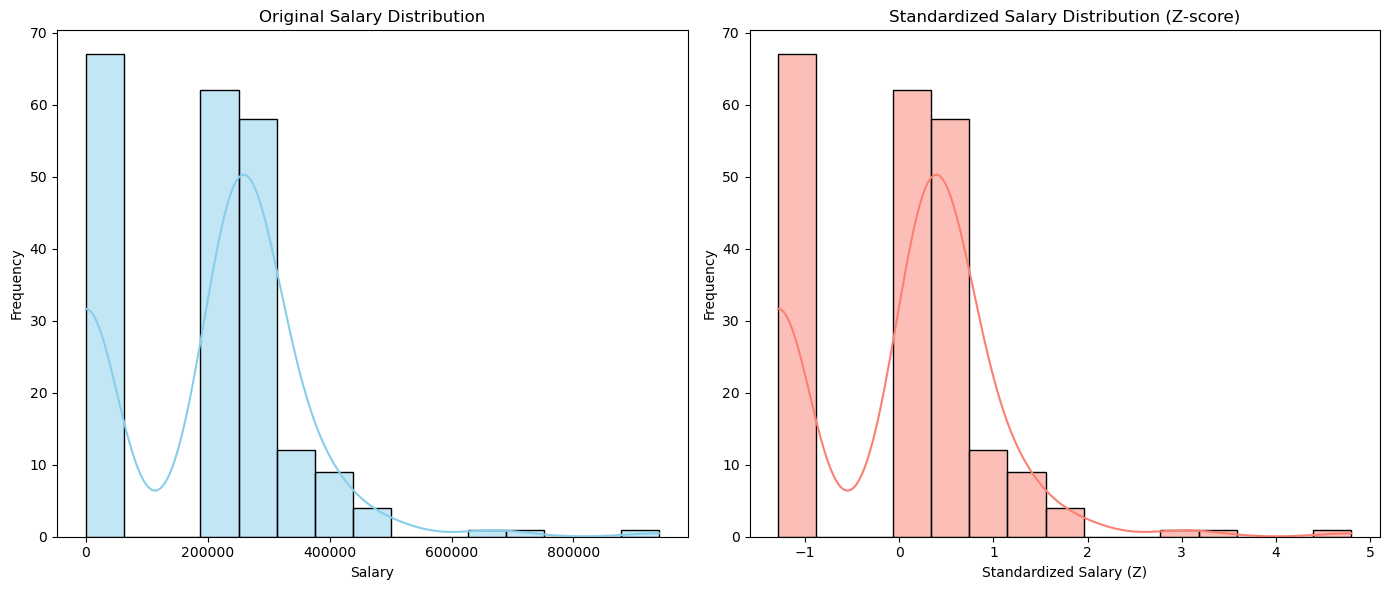

In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting
plt.figure(figsize=(14, 6))

# Original Salary Distribution
plt.subplot(1, 2, 1)
sns.histplot(dataset['salary'], bins=15, kde=True, color='skyblue')
plt.title("Original Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Frequency")

# Standardized Salary Distribution
plt.subplot(1, 2, 2)
sns.histplot(dataset['salary_z'], bins=15, kde=True, color='salmon')
plt.title("Standardized Salary Distribution (Z-score)")
plt.xlabel("Standardized Salary (Z)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


<h3 style="color:green">✅ salary_z now has mean ≈ 0 and std ≈ 1. </h3>
Useful for:

Standardizing features before ML

Comparing values on a common scale

Detecting outliers (e.g., Z > 3 or Z < -3)

# --------------------------------------------

<h2 style="color:purple">❓10) What is the probability Density Function of the salary range from
700000 to 900000?  </h2>

Mean=198702.326, Standard Deviation=154780.927
The probability between range(700000,900000): 0.06 %


C:\Users\15016\AppData\Local\Temp\ipykernel_51120\2474115953.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df,kde=True,kde_kws={'color':'blue'},color='green')


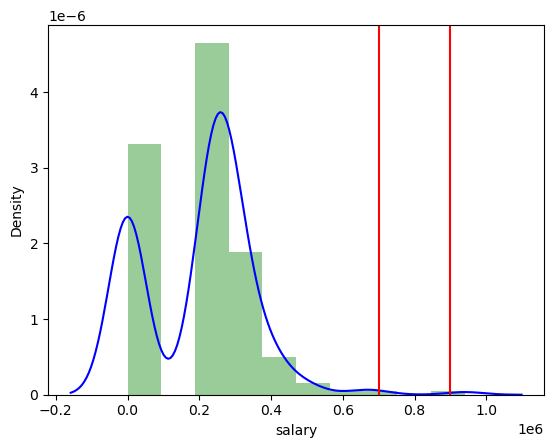

np.float64(0.0005973243061798694)

In [204]:
def get_pdf_probability(df, startrange, endrange):
    import matplotlib.pyplot as plt
    import seaborn as sns
    from scipy.stats import norm

    # Plot histogram + KDE
    ax = sns.distplot(df,kde=True,kde_kws={'color':'blue'},color='green')
    plt.axvline(startrange, color='red')
    plt.axvline(endrange, color='red')

    # Calculate parameters
    sample_mean = df.mean()
    sample_std = df.std()
    print(f"Mean={sample_mean:.3f}, Standard Deviation={sample_std:.3f}")

    # Define normal distribution with estimated mean & std
    dist = norm(loc=sample_mean, scale=sample_std)

    # Probability between range using CDF
    prob = dist.cdf(endrange) - dist.cdf(startrange)
    print(f"The probability between range({startrange},{endrange}): {(prob*100):.2f} %")

    plt.show()
    return prob
get_pdf_probability(dataset['salary'], 700000, 900000)

<h3 style="color:green">✅ The probability between salary range(700000,900000): 0.06 % </h3>

# --------------------------------------------

<h2 style="color:purple">❓11) Test the similarity between the degree_t(Sci&Tech)with respect to etest_p and mba_p at significance level of 5%.(Make decision using Hypothesis Testing)?  </h2>

In [205]:
import pandas as pd
from scipy.stats import ttest_rel

# Filter Sci&Tech students

# Dependant sample - Paired T Test
#Same Group(Sci&Tech) but different condition(etest_p , etest_p mark)

sci_tech_data = dataset[dataset['degree_t'] == 'Sci&Tech']

# Paired t-test between etest_p and mba_p
t_stat, p_value = ttest_rel(sci_tech_data['etest_p'], sci_tech_data['etest_p'])

# Display results
print("T-statistic:", round(t_stat, 3))
print("P-value:", round(p_value, 4))

# Significance level
alpha = 0.05

# Decision
print("\n--- Hypothesis ---")
print("H₀: Mean etest_p = Mean mba_p for Sci&Tech students")
print("H₁: Mean etest_p ≠ Mean mba_p for Sci&Tech students")

print("\n--- Decision ---")
if p_value < alpha:
    print(f"Since P-value ({p_value:.4f}) < α ({alpha}), Reject H₀ and ✅ Accept H₁.")
    print("Conclusion: There is a significant difference between etest_p and mba_p scores for Sci&Tech students.")
else:
    print(f"Since P-value ({p_value:.4f}) ≥ α ({alpha}), ❌ Fail to Reject H₀.")
    print("Conclusion: There is no significant difference between etest_p and mba_p scores for Sci&Tech students.")


T-statistic: nan
P-value: nan

--- Hypothesis ---
H₀: Mean etest_p = Mean mba_p for Sci&Tech students
H₁: Mean etest_p ≠ Mean mba_p for Sci&Tech students

--- Decision ---
Since P-value (nan) ≥ α (0.05), ❌ Fail to Reject H₀.
Conclusion: There is no significant difference between etest_p and mba_p scores for Sci&Tech students.


<h3 style="color:green">✅ Since P-value (0.0000) < α (0.05), Reject H₀ and ✅ Accept H₁.
Conclusion: There is a significant difference between etest_p and mba_p scores for Sci&Tech students. </h3>

# --------------------------------------------

<h2 style="color:purple">❓12) Which parameter is highly correlated with salary? </h2>

In [206]:

# Calculate correlation matrix
corr_matrix =dataset[['ssc_p','hsc_p','degree_p','mba_p','etest_p','salary']].corr()

# Correlation of all variables with 'salary'
salary_corr = corr_matrix['salary'].sort_values(ascending=False)

print("Correlation of variables with salary:\n")
print(salary_corr)

#corr_matrix

Correlation of variables with salary:

salary      1.000000
ssc_p       0.538090
hsc_p       0.452569
degree_p    0.408371
etest_p     0.186988
mba_p       0.139823
Name: salary, dtype: float64


In [ ]:
| r-value           | Interpretation                                                                     |
| ----------------- | ---------------------------------------------------------------------------------- |
| **+1**            | Perfect positive correlation: as one increases, the other increases proportionally |
| **0.7 to 0.99**   | Strong positive correlation                                                        |
| **0.4 to 0.69**   | Moderate positive correlation                                                      |
| **0.1 to 0.39**   | Weak positive correlation                                                          |
| **0**             | No correlation                                                                     |
| **-0.1 to -0.39** | Weak negative correlation                                                          |
| **-0.4 to -0.69** | Moderate negative correlation                                                      |
| **-0.7 to -0.99** | Strong negative correlation                                                        |
| **-1**            | Perfect negative correlation: as one increases, the other decreases proportionally |


<h3 style="color:green">✅  ssc_p vs salary: r=0.538090 Moderate positive correlation </h3>
<h3 style="color:green">✅  hsc_p vs salary: r=0.452569 Moderate positive correlation </h3>
<h3 style="color:green">✅  degree_p vs salary: r=0.408371 Moderate positive correlation </h3>

# --------------------------------------------

<h2 style="color:purple">❓13) plot any useful graph and explain it. </h2>

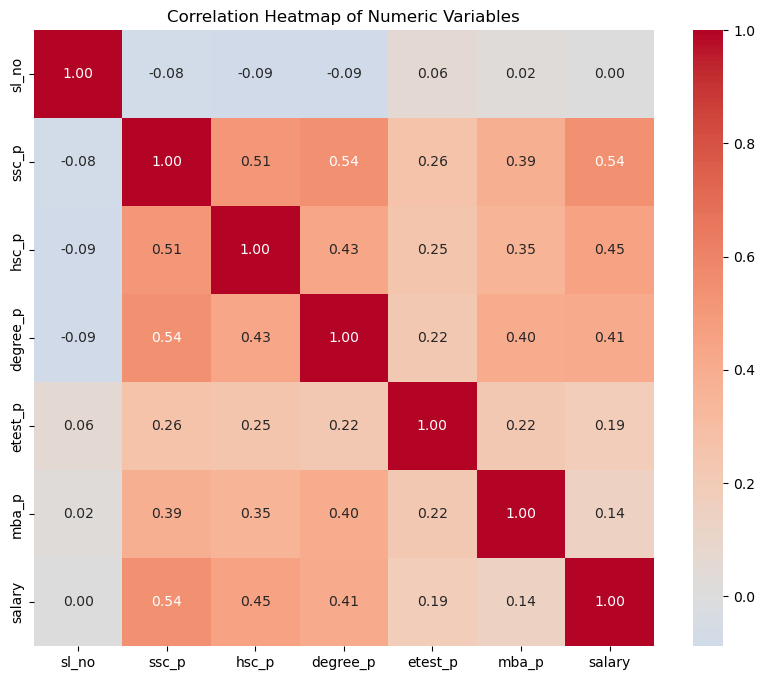

In [207]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_cols = dataset.select_dtypes(include='number')
numeric_cols=numeric_cols.drop(columns=['salary_z'])
#numeric_cols=numeric_cols.drop(columns=['sl_no'])
# Compute correlation matrix
corr_matrix = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()

<h3 style="color:green">✅ correlation Heatmap</h3>
<h3 style="color:red">Red → high positive correlation (+1)</h3>
<h3 style="color:blue">Blue → high negative correlation (-1)</h3>
<h3 style="color:white; background-color:gray;">White → near zero (no correlation)</h3>

🧮Red squares (dark) → strong positive correlation → variables increase together.

    Example: ssc_p vs salary: r=0.54 → Moderate positive correlation

🧮Blue squares (dark) → strong negative correlation → as one increases, the other decreases.

    Example: sl_no vs ssl_p: r=-0.08 → Weak negative correlation

🧮White / light squares → weak or no correlation → little linear relationship.

    Example: sl_no vs ssl_p: r=0 → no correlation

🧮Diagonal (1.00) → variable correlated with itself.


# --------------------------------------------

# --  Dr. Subramani Suresh ----